In [1]:
import numpy as np
import matplotlib as plt
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import *

from CustomAlgorithm import *

drive = "/run/media/mateusz/Seagate Expansion Drive"

In [2]:
df = pd.read_csv("results/2021-08-04-9-43-michal.csv")
df.sort_values(["count"], inplace=True, ascending=False)

for index, row in df.iterrows():
    p = PurePath(row['file'])
    p = Path(*p.parts[5:])
    p = drive / p
    df.at[index, 'file'] = str(p)


In [3]:
df

,Unnamed: 0,file,start_frame,end_frame,box_up_left_x,box_up_left_y,box_down_right_x,box_down_right_y,length,count
1434,1434,/run/media/mateusz/Seagate Expansion Drive/N2B...,0,725,1044,404,1917,427,507.098610,1727
674,674,/run/media/mateusz/Seagate Expansion Drive/N2B...,5,605,1484,639,1616,708,148.946299,1617
4715,4715,/run/media/mateusz/Seagate Expansion Drive/N1B...,7,799,1237,712,1388,804,173.738309,1479
675,675,/run/media/mateusz/Seagate Expansion Drive/N2B...,5,605,1517,623,1627,690,104.000000,1471
4659,4659,/run/media/mateusz/Seagate Expansion Drive/N1B...,23,816,1292,911,1401,1007,26.076810,1435
...,...,...,...,...,...,...,...,...,...,...
266,266,/run/media/mateusz/Seagate Expansion Drive/N2B...,29,33,1231,654,1238,660,23.853721,2
265,265,/run/media/mateusz/Seagate Expansion Drive/N2B...,29,33,1231,660,1239,664,31.144823,2
384,384,/run/media/mateusz/Seagate Expansion Drive/N2B...,31,34,856,874,859,876,20.124612,2
264,264,/run/media/mateusz/Seagate Expansion Drive/N2B...,29,33,1229,660,1231,669,29.154759,2


In [4]:
triggers = [TriggerInfo.from_csv_row(row) for index, row in df.iterrows()]

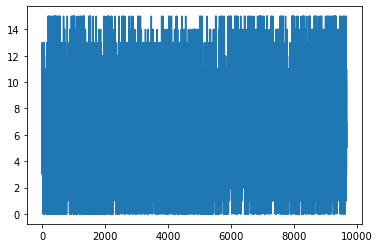

In [5]:
sections = [(trigger.get_center().x, trigger.get_center().y) for trigger in triggers]
xs = ys = []

for section in sections:
    xs.append(section[0] // 120)
    ys.append(section[1] // 120)
    
plt.plot(xs)

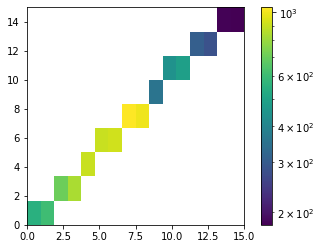

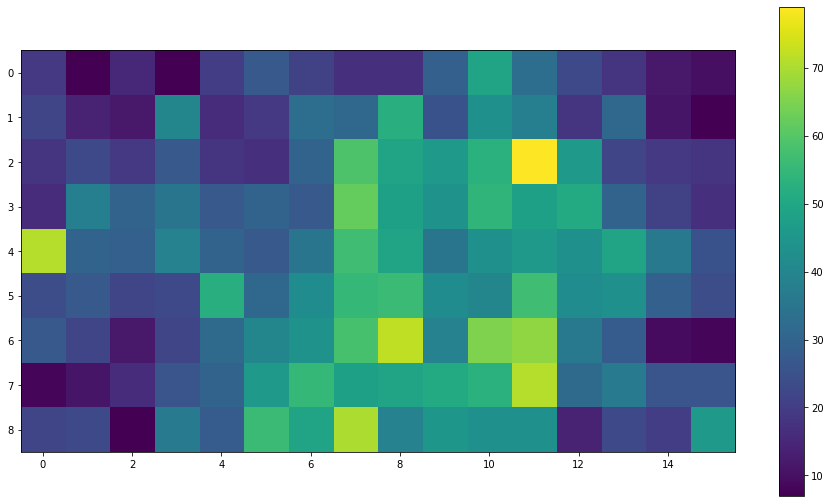

In [25]:
from matplotlib.colors import LogNorm

parts = 120 # px

plt.hist2d(xs, ys, 
    bins=(1920 // parts, 1080 // parts), 
    norm=LogNorm())
plt.gca().set_aspect('equal')
plt.colorbar()
plt.show()

z = np.zeros(shape=(1080 // parts, 1920 // parts))

for section in sections:
    x , y = section
    z[y // parts][x // parts] += 1

%matplotlib inline
plt.figure(figsize=(1920//120, 1080//120))
plt.imshow(z)
plt.gca().set_aspect('equal')
plt.colorbar()
plt.show()

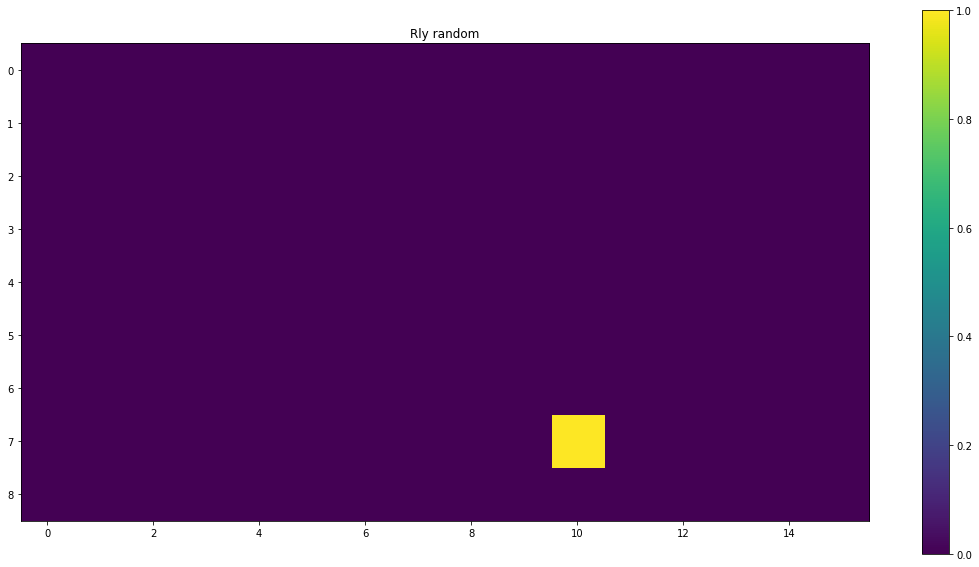

In [24]:
import random

rect_size  = 120

z = np.zeros(shape=(1080 // rect_size, 1920 // rect_size))

for _ in range(len(df)):
    x = random.randint(0,1920 // rect_size)
    y = random.randint(0,1080 // rect_size)
    z[y][x] += 1

%matplotlib inline
plt.figure(figsize=(1920//100, 1080//100),)
plt.imshow(z)
plt.title("Rly random")
plt.gca().set_aspect('equal')
plt.colorbar()
plt.show()

In [23]:
%matplotlib
# for row in range(len(df)):
#     show_trigger(TriggerInfo.from_csv_row(df.iloc[0]))
#     break

import random

show_trigger(TriggerInfo.from_csv_row(df.iloc[random.randint(0, 3000)]))

Using matplotlib backend: TkAgg


IndexError: single positional indexer is out-of-bounds

In [9]:
# cols_check = merged_rev_df['cell_id'] % num_spacial_horizontal_steps
# rows_check = merged_rev_df['cell_id'] // num_spacial_horizontal_steps

# np.min(cols_check == (merged_rev_df['rect_x_min'] + merged_rev_df['rect_centeroid_x']) // SPACIAL_RESOLUTION_UNIT[0])
# 
# np.min(rows_check == (merged_rev_df['rect_y_min'] + merged_rev_df['rect_centeroid_y']) // SPACIAL_RESOLUTION_UNIT[1])

NameError: name 'merged_rev_df' is not defined

In [15]:
df = pd.read_csv("out.csv")

In [16]:
df

,Unnamed: 0,file,start_frame,end_frame,box_up_left_x,box_up_left_y,box_down_right_x,box_down_right_y,length,count,section
0,0,/run/media/mateusz/Seagate Expansion Drive//N2...,28,41,960,318,965,356,37.215588,14,40


In [18]:
%matplotlib
# plt.Figure(figsize=(1920 // 60, 1080 //60))
for i in range(len(df)):
    show_trigger(TriggerInfo.from_csv_row(df.iloc[i]), (1920, 1080))

Using matplotlib backend: TkAgg
